In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the dataset into a DataFrame

In [5]:
df=pd.read_csv("Indian_Kids_Screen_Time.csv")

In [ ]:
# Check basic information about the dataset

In [6]:
df

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban
...,...,...,...,...,...,...,...,...
9707,17,Male,3.26,Smartphone,True,0.44,Poor Sleep,Urban
9708,17,Female,4.43,Smartphone,True,0.40,Poor Sleep,Rural
9709,16,Male,5.62,Smartphone,True,0.39,"Poor Sleep, Eye Strain, Anxiety",Rural
9710,17,Male,5.60,TV,True,0.43,Poor Sleep,Urban


In [7]:
df.size

77696

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [9]:
print(df.isnull().sum())

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64


In [ ]:
# Handle missing data in the 'Health_Impacts' column
# Missing values are replaced with 'Unknown' to avoid errors in analysis

In [10]:
df['Health_Impacts'] = df['Health_Impacts'].fillna('Unknown')

In [11]:
print(df.isnull().sum())

Age                                  0
Gender                               0
Avg_Daily_Screen_Time_hr             0
Primary_Device                       0
Exceeded_Recommended_Limit           0
Educational_to_Recreational_Ratio    0
Health_Impacts                       0
Urban_or_Rural                       0
dtype: int64


In [ ]:
# Explore distribution of Urban vs Rural kids

In [12]:
df['Urban_or_Rural'].value_counts()

Urban_or_Rural
Urban    6851
Rural    2861
Name: count, dtype: int64

In [ ]:
# Explore the primary devices used by kids

In [13]:
df['Primary_Device'].value_counts()

Primary_Device
Smartphone    4568
TV            2487
Laptop        1433
Tablet        1224
Name: count, dtype: int64

In [ ]:
# Explore gender distribution

In [14]:
df['Gender'].value_counts()

Gender
Male      4942
Female    4770
Name: count, dtype: int64

In [ ]:
# Create age bands for children

In [15]:
import pandas as pd

bins = [0, 8, 12, 17]
labels = ['Kids', 'Pre-Teens', 'Teens']
df['Age_Band'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)


In [ ]:
# Classify kids based on daily screen time

In [16]:
df['Usage_Category'] = pd.cut(
    df['Avg_Daily_Screen_Time_hr'],
    bins=[0, 2, 4, 8, 12],
    labels=['Low', 'Moderate', 'High', 'Excessive']
)


In [ ]:
# Calculate Screen Time Efficiency
# Efficiency = educational/recreational ratio per hour of screen time, rounded to 2 decimals

In [17]:
df['Screen_Time_Efficiency'] = (
    df['Educational_to_Recreational_Ratio'] / df['Avg_Daily_Screen_Time_hr']
).round(2)


In [18]:
df.to_csv('cleaned_kids_screentime.csv', index=False)


C:\Users\pulib\AppData\Local\Temp\ipykernel_5900\1414826105.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Urban_or_Rural', palette='Set2')


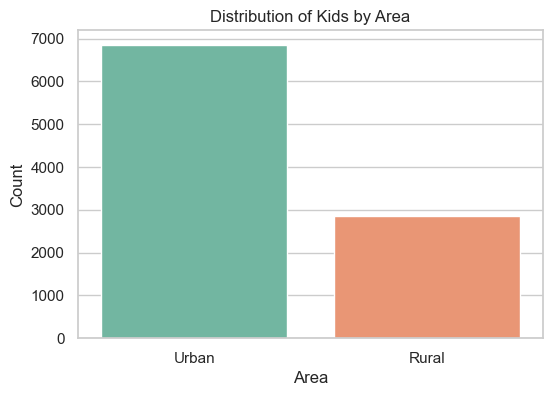

In [19]:

sns.set(style="whitegrid")
# 1. Urban vs Rural distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Urban_or_Rural', palette='Set2')
plt.title('Distribution of Kids by Area')
plt.xlabel('Area')
plt.ylabel('Count')
plt.show()

C:\Users\pulib\AppData\Local\Temp\ipykernel_5900\2085412523.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Primary_Device', order=df['Primary_Device'].value_counts().index, palette='Set3')


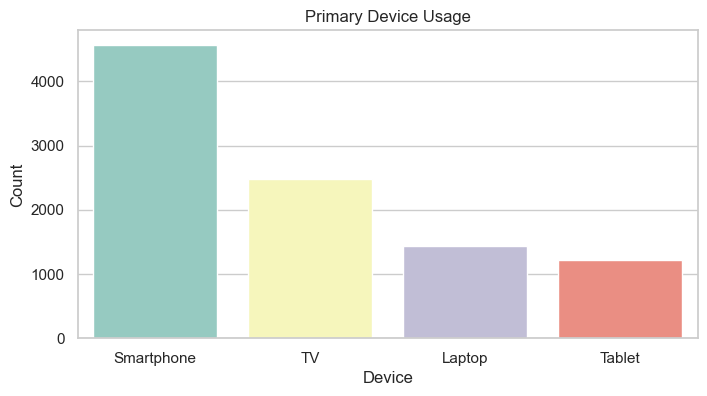

In [20]:
# 2. Primary Device usage
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Primary_Device', order=df['Primary_Device'].value_counts().index, palette='Set3')
plt.title('Primary Device Usage')
plt.xlabel('Device')
plt.ylabel('Count')
plt.show()

C:\Users\pulib\AppData\Local\Temp\ipykernel_5900\1698805785.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='pastel')


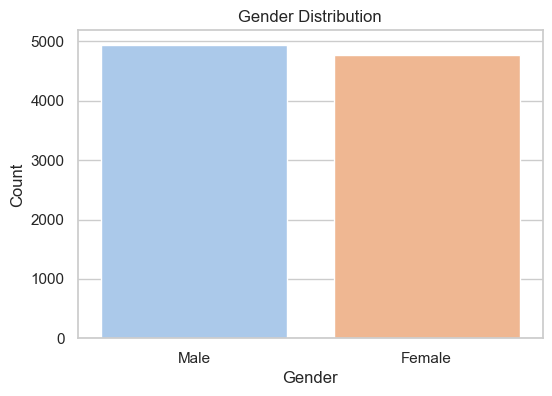

In [21]:
# 3. Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

C:\Users\pulib\AppData\Local\Temp\ipykernel_5900\1650859646.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Age_Band', palette='coolwarm')


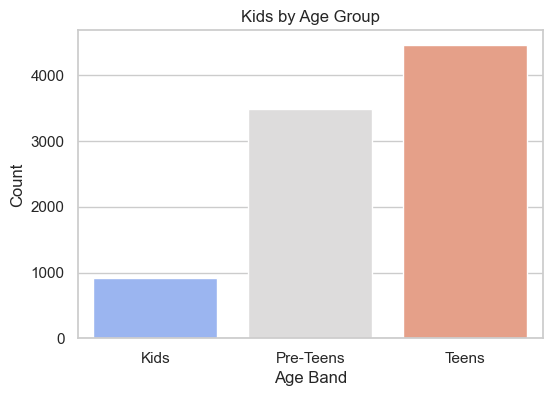

In [22]:
# 4. Age Band distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Age_Band', palette='coolwarm')
plt.title('Kids by Age Group')
plt.xlabel('Age Band')
plt.ylabel('Count')
plt.show()

C:\Users\pulib\AppData\Local\Temp\ipykernel_5900\854768287.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Age_Band', palette='coolwarm')


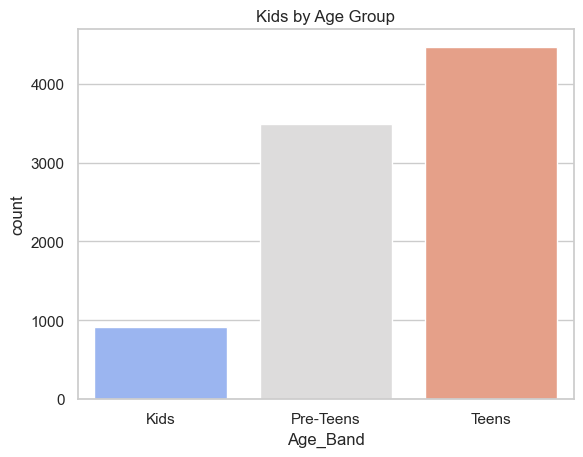

In [23]:
sns.countplot(data=df, x='Age_Band', palette='coolwarm')
plt.title('Kids by Age Group')
plt.show()


In [ ]:
# Screen Time Usage Category

C:\Users\pulib\AppData\Local\Temp\ipykernel_5900\3329619348.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Usage_Category', palette='viridis')


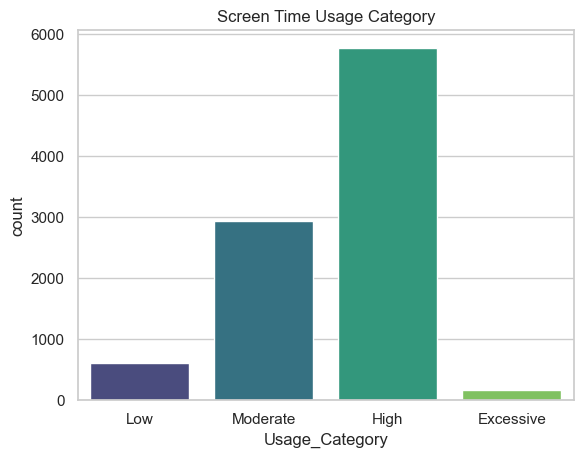

In [24]:
sns.countplot(data=df, x='Usage_Category', palette='viridis')
plt.title('Screen Time Usage Category')
plt.show()


In [ ]:
#Screen Time Efficiency
#Efficiency = Educational / Recreational Ratio ÷ Avg Daily Screen Time

C:\Users\pulib\AppData\Local\Temp\ipykernel_5900\334337511.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Age_Band', y='Screen_Time_Efficiency', palette='magma')


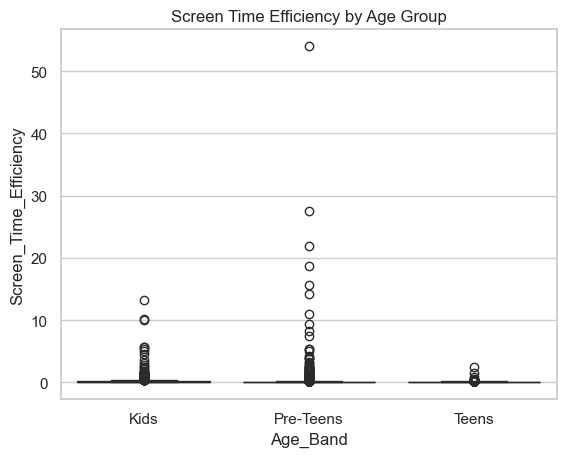

In [25]:
sns.boxplot(data=df, x='Age_Band', y='Screen_Time_Efficiency', palette='magma')
plt.title('Screen Time Efficiency by Age Group')
plt.show()
